<img src="py-logo.png" width="100pt"/>


# INTRODUCTION TO PYTHON 
# III — VISUALISATION
*Lasse Ruokolainen*

*Seasoned Data Master, BILOT Consulting Oy* 

***

## (1) Pandas plotting
Pandas dataframes have inbuilt methods for easy data visualisation.

### (a) *Simple plots*
You can simply draw a plot from a dataframe by using the `.plot()` method (see `help(df.plot)`). 

In [2]:
import pandas as pd

# read in example data from URL repository:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


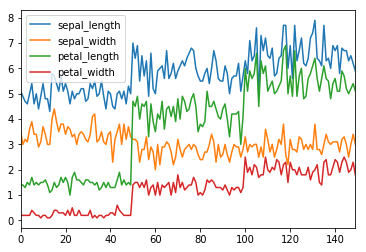

In [3]:
import matplotlib.pyplot as plt

# plot numeric variables automatically:
df.plot(subplots=False)
plt.show()

This is quite handy, all variables are plotted and a legend is added without the need to make any specifications. The different variables can be set to appear in separate subplots, by giving an input argument `subplots=True` to the `.plot()` method.

In the same manner, one can conveniently plot the frequency distribution of all numeric variables at once, by using `pandas` plotting. In this case the method to use is `.hist()`.

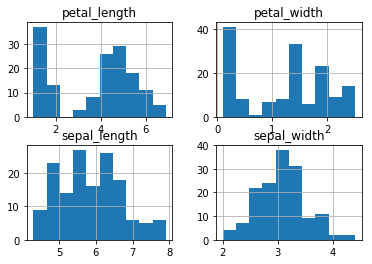

In [4]:
# plot the distribution of numeric variables automatically:
df.hist()
plt.show()

OK, this is good, but what about the different species? They probably have different distributions for each variable.

### (c) *More advanced plots*
Next you will learn to make more complicated plots, still using `pylot` from `matplotlib` together with `pandas`. Let's start by drawing a separate histogram for each species in the `iris` data:

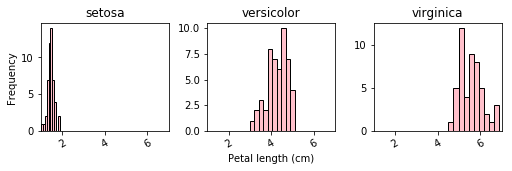

In [5]:
# plot distribution for each species separately:
ax = df[['petal_length','species']].hist(
    by='species',
    layout=(1,3),
    figsize=(8,2),
    xrot=30,
    color='pink',
    edgecolor='k'
)
ax[1].set_xlabel("Petal length (cm)")
ax[0].set_ylabel("Frequency")
for i in range(0,3):
    ax[i].set_xlim([1,7])
plt.show()

In the above example, several arguments were passed to method `.hist()`, one specifying grouping (`by`), another giving the layout of the panels (`layout`; 1 row and 3 columns), the third one adjusting figure size (`figsize`; width and height), the fourth one setting a 30° rotation to x-axis tick labels (`xrot`), and the fifth argument (`color`) specifies the colour (see https://matplotlib.org/2.0.0/examples/color/named_colors.html). 

Finally, the bars are set to have black edges (`edgecolor = 'k'`). In addition, the output of the plotting command was stored to an object `ax`, which is later used to modify individual subplots. 

Another option is to use boxplots to illustrate variable distributions:

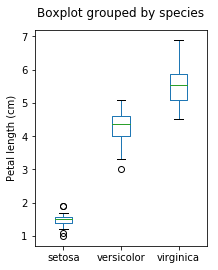

In [6]:
df.boxplot(column='petal_length',
           by='species',grid=False,
           figsize=(3,4))
plt.title('')
plt.xlabel('')
plt.ylabel('Petal length (cm)')
plt.show()

Next let's try to make a scatterplot, with points coloured by species.

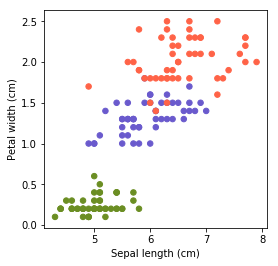

In [7]:
# make a dictionary associating a color to each species:
cols = {'setosa':'olivedrab','versicolor':'slateblue','virginica':'tomato'}
# use .map() to map colors to species:
df['color'] = df['species'].map(cols)

# plot scatterplot with specified colours:
df.plot(kind='scatter',
        x='sepal_length',
        y='petal_width',
        c=df.color,
        figsize=(4,4),s=30)
plt.title('')
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal width (cm)")
plt.show()

Next we'll use another plotting library for making figures.

## (2) Seaborn plotting
Seaborn is a Python library that is primarily meant for statistical plotting (see https://seaborn.pydata.org/index.html).

### (a) *Scatter plots*
Let's start by making the same plot as above, but this time using `seaborn`.

In [8]:
# import library:
import seaborn as sns

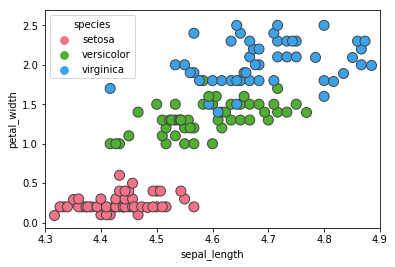

In [10]:
# get data:
iris = sns.load_dataset("iris")

h = sns.swarmplot(
    x='sepal_length',
    y='petal_width',
    hue='species',
    data=iris,palette='husl',
    edgecolor='gray',
    linewidth=1,size=10)
plt.setp(h,xticks=range(-1,40,6))
plt.show()

### (b) *Distributions*
When examining pattern in the data, it is often usefull to somehow illustrate how different variables are distributed, either alone ar in relation to other variables. Above we used boxplots and histograms in `pandas` and these also available in `seaborn`. To make something different, let's look at *violin plots* here.

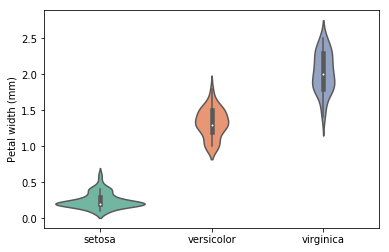

In [11]:
# draw a violin plot of a numerical variable, per a grouping variable:
sns.violinplot(x='species',y='petal_width',data=iris,palette='Set2')
plt.xlabel('')
plt.ylabel('Petal width (mm)')
plt.show()

In [12]:
# melt dataframe to tidy format:
df_melt = df.melt(id_vars=['species','color'],
                  value_name='measure')

df_melt.tail()

,species,color,variable,measure
595,virginica,tomato,petal_width,2.3
596,virginica,tomato,petal_width,1.9
597,virginica,tomato,petal_width,2.0
598,virginica,tomato,petal_width,2.3
599,virginica,tomato,petal_width,1.8


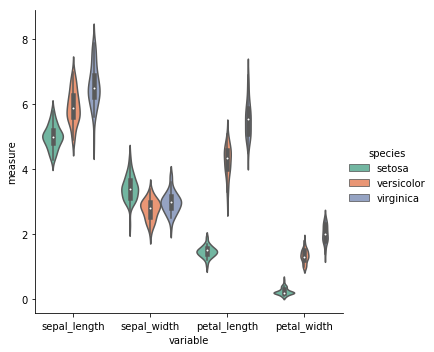

In [16]:
# plot a violinplot of each variable in the melted dataframe: 
sns.catplot(x='variable',y='measure',hue='species',height=5,
                   data=df_melt, kind="violin",palette='Set2')
plt.show()

Next, let's see some cool advanced features we can use in `seaborn`.

In [17]:
# color violins asymmetrically:

# get data:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


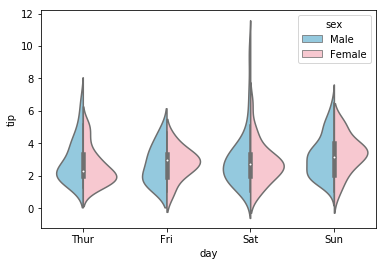

In [18]:
sns.violinplot(data=tips,x='day',y='tip',
               hue='sex',split=True,
               palette=['skyblue','pink'])
plt.show()

In this case, the box inside the violin is for the entire data (within each day), whereas the violin is asymmetric depending on the gender of the service person.

### (c) *DataFrame plot*
If a dataframe does not contain too many (numeric) variables, a nice way of visualising both their relationshis and distributions is to plot the entire dataframe. This can be done using `.pairplot()` in `seaborn`.

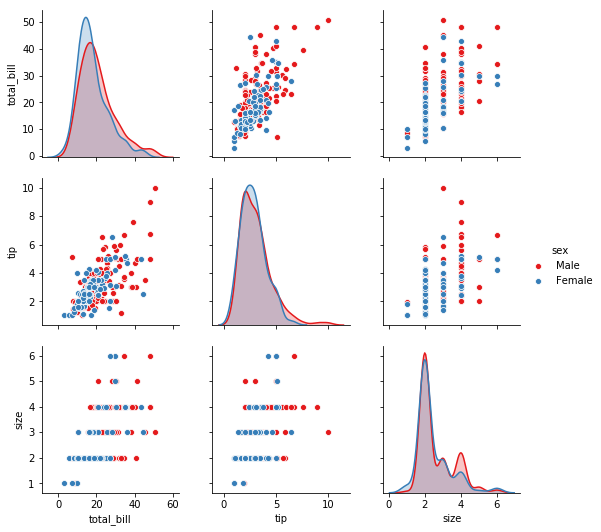

In [19]:
sns.pairplot(tips, hue="sex",palette='Set1')
plt.show()

### (d) *Regression plot*
If one wishes to visualise regression between variables, there is a convenient function in `seaborn` for that; `lmplot()`.

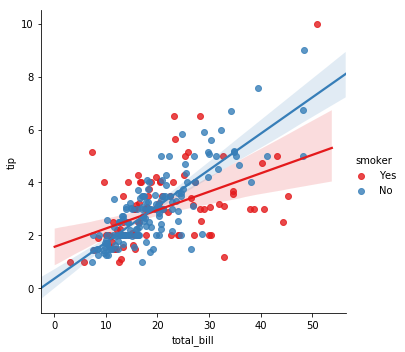

In [20]:
# make separate fits by category:
sns.lmplot(x='total_bill',y='tip',data=tips,
           hue='smoker',truncate=False,palette='Set1')
plt.show()

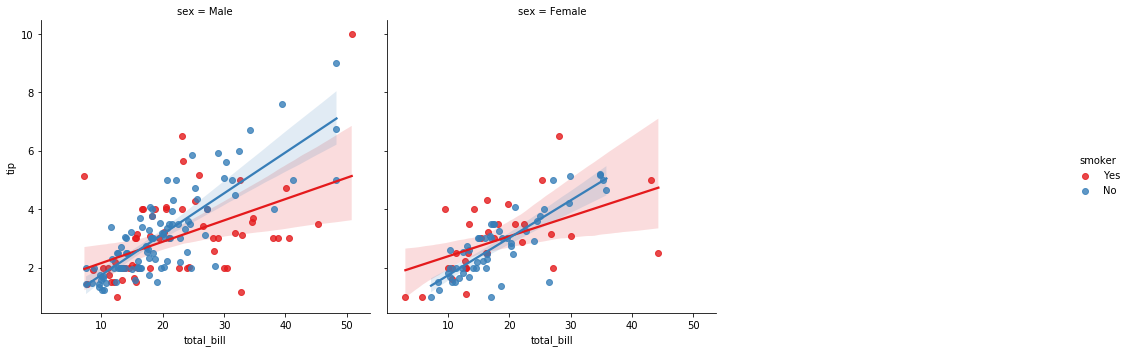

In [21]:
# split to separate panels by a category:
sns.lmplot(x='total_bill',y='tip',data=tips,
           col='sex',hue='smoker',
           truncate=True,palette='Set1',
           lowess=False,col_wrap=3)
plt.show()

Another option to `lmplot` is to use `jointplot`. However, this fucntion does not allow for groups to be displayed.

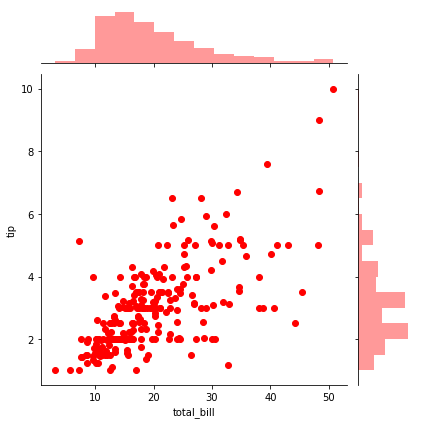

In [22]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='scatter',color='red')
plt.show()

In [24]:
# Get more info from Docstring:
sns.jointplot?